# Создание модели

Модель сначала сжимает входные значения через Linear, затем LSTM извлекает последовательные зависимости. <br>
Attention позволяет выбрать наиболее значимые участки этой памяти. Маска позволяет игнорировать паддинги. <br>
В результате модель агрегирует информацию в контекстный вектор и делает регрессионное предсказание следующего значения <br>

In [1]:
from models.lstm_with_attention import LSTMWithAttention

### Визуализация модели

Total parameters:     264,962
Trainable parameters: 264,962



(process:22612): Pango-WARNING **: 18:55:53.939: couldn't load font "Linux libertine Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


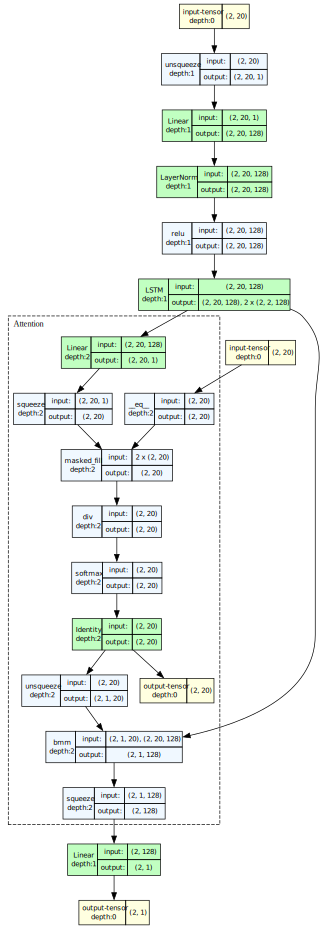

In [2]:
import torch
from torchview import draw_graph

# Параметры модели
input_dim = 1
hidden_dim = 128
num_layers = 2
seq_len = 20
batch_size = 2

x = torch.randn(batch_size, seq_len)
mask = torch.ones(batch_size, seq_len).bool()

# Инициализация модели
model = LSTMWithAttention(input_dim=input_dim, hidden_dim=hidden_dim, num_layers=num_layers, dropout=0.1, bidirectional=False)

print(f"Total parameters:     {model.count_parameters():,}")
print(f"Trainable parameters: {model.count_parameters():,}")


draw_graph(model, input_data=(x, mask), expand_nested=True).visual_graph

# Генерация данных


In [4]:
from data.generators import generate_data

data, labels, masks = generate_data(num_samples=200_000)
print("Data shape:", data.shape)
print("Labels shape:", labels.shape)
print("Masks shape:", masks.shape)

Data shape: torch.Size([200000, 20])
Labels shape: torch.Size([200000])
Masks shape: torch.Size([200000, 20])


In [5]:
from data.dataset import build_dataloaders

train_loader, val_loader, test_loader = build_dataloaders(data, labels, masks, split=(0.8, 0.1, 0.1))

In [ ]:
next(iter(train_loader))

# Обучение

In [6]:
import torch
from train_model import train_model

print('Torch CUDA status: \n\t%s' %
      '✅ Available' if torch.cuda.is_available() else '❌ NOT available', '\n')

# Обучение
trained_model, train_losses, val_losses = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    epochs=200,  # 1000
    patience=15,  # 20
    lr=1e-3,
    device='cuda' if torch.cuda.is_available() else 'cpu'
)

Torch CUDA status: 
	✅ Available 



[Epoch 1] Train Loss: 8493103.5491 | Val Loss: 9213522.4841
Example input: [ 1.7490915  4.6060934  2.6261299  5.589648   3.6418893  6.556031
  4.429353   7.524318   5.5298247  8.532417   6.411857   9.511386
  7.522179  10.495614   8.427832  11.468048   9.6072445 12.673303 ]
Example target: 10.614617347717285
Example prediction: 13.41926383972168


[Epoch 2] Train Loss: 8278736.1617 | Val Loss: 8985871.0268


[Epoch 3] Train Loss: 8073838.9471 | Val Loss: 8766960.2973


[Epoch 4] Train Loss: 7874533.4160 | Val Loss: 8553009.8375


[Epoch 5] Train Loss: 7688330.0473 | Val Loss: 8350214.3690


[Epoch 6] Train Loss: 7500171.2152 | Val Loss: 8149866.2807


[Epoch 7] Train Loss: 7323420.8033 | Val Loss: 7961253.7565


[Epoch 8] Train Loss: 7151978.7444 | Val Loss: 7773169.3941


[Epoch 9] Train Loss: 6983617.3963 | Val Loss: 7591209.7428


[Epoch 10] Train Loss: 6821908.2327 | Val Loss: 7414625.5457


[Epoch 11] Train Loss: 6664800.1479 | Val Loss: 7245017.9491


[Epoch 12] Train Loss: 6512823.2651 | Val Loss: 7078769.9360


[Epoch 13] Train Loss: 6363579.9528 | Val Loss: 6915698.2091


[Epoch 14] Train Loss: 6217533.6539 | Val Loss: 6754257.8487


[Epoch 15] Train Loss: 6075918.6138 | Val Loss: 6599657.7350


[Epoch 16] Train Loss: 5939523.7318 | Val Loss: 6450670.1410


[Epoch 17] Train Loss: 5807114.2472 | Val Loss: 6304756.9583


[Epoch 18] Train Loss: 5677946.4989 | Val Loss: 6162771.1323


[Epoch 19] Train Loss: 5554078.3799 | Val Loss: 6026518.0242


[Epoch 20] Train Loss: 5429725.9443 | Val Loss: 5887372.7760


[Epoch 21] Train Loss: 5308507.7237 | Val Loss: 5755156.4660


[Epoch 22] Train Loss: 5191796.8270 | Val Loss: 5625917.1955


[Epoch 23] Train Loss: 5078562.5825 | Val Loss: 5500811.4346


[Epoch 24] Train Loss: 4967942.7711 | Val Loss: 5378179.1376


[Epoch 25] Train Loss: 4859370.7761 | Val Loss: 5257405.7972


[Epoch 26] Train Loss: 4754938.9195 | Val Loss: 5142689.0527


[Epoch 27] Train Loss: 4652634.9008 | Val Loss: 5028470.2997


[Epoch 28] Train Loss: 4551563.2778 | Val Loss: 4915865.1672


[Epoch 29] Train Loss: 4453436.2173 | Val Loss: 4807030.0147


[Epoch 30] Train Loss: 4357266.1743 | Val Loss: 4699971.1441


[Epoch 31] Train Loss: 4263674.2274 | Val Loss: 4596506.5513


[Epoch 32] Train Loss: 4172938.0662 | Val Loss: 4495116.6635


[Epoch 33] Train Loss: 4083153.1778 | Val Loss: 4395117.3106


[Epoch 34] Train Loss: 3995515.3326 | Val Loss: 4296980.2395


[Epoch 35] Train Loss: 3909736.5944 | Val Loss: 4202220.5082


[Epoch 36] Train Loss: 3827203.3539 | Val Loss: 4109881.8619


[Epoch 37] Train Loss: 3746258.0976 | Val Loss: 4019985.0440


[Epoch 38] Train Loss: 3666367.8418 | Val Loss: 3930443.2361


[Epoch 39] Train Loss: 3589251.0152 | Val Loss: 3844937.9022


[Epoch 40] Train Loss: 3513198.1342 | Val Loss: 3759826.4645


[Epoch 41] Train Loss: 3438684.3743 | Val Loss: 3676932.1152


[Epoch 42] Train Loss: 3366674.9394 | Val Loss: 3596086.2506


[Epoch 43] Train Loss: 3296042.0628 | Val Loss: 3518142.5053


[Epoch 44] Train Loss: 3227102.9912 | Val Loss: 3440329.7144


[Epoch 45] Train Loss: 3159764.9821 | Val Loss: 3365591.2366


[Epoch 46] Train Loss: 3094777.8062 | Val Loss: 3293074.0142


[Epoch 47] Train Loss: 3030799.7620 | Val Loss: 3220799.9387


[Epoch 48] Train Loss: 2966836.2002 | Val Loss: 3149941.5911


[Epoch 49] Train Loss: 2904855.6083 | Val Loss: 3080487.0068


[Epoch 50] Train Loss: 2843751.7178 | Val Loss: 3012860.4730


[Epoch 51] Train Loss: 2784563.0130 | Val Loss: 2946731.9146


[Epoch 52] Train Loss: 2727503.6813 | Val Loss: 2883154.0297


[Epoch 53] Train Loss: 2670735.3401 | Val Loss: 2819258.9787


[Epoch 54] Train Loss: 2614795.2687 | Val Loss: 2757154.0330


[Epoch 55] Train Loss: 2560630.1584 | Val Loss: 2696157.4839


[Epoch 56] Train Loss: 2507088.3211 | Val Loss: 2636768.7218


[Epoch 57] Train Loss: 2454620.4045 | Val Loss: 2578319.5214


[Epoch 58] Train Loss: 2404212.6427 | Val Loss: 2522750.5744


[Epoch 59] Train Loss: 2355463.4279 | Val Loss: 2467996.7170


[Epoch 60] Train Loss: 2307190.9611 | Val Loss: 2414189.6543


[Epoch 61] Train Loss: 2259248.9787 | Val Loss: 2362758.7183


[Epoch 62] Train Loss: 2212673.8152 | Val Loss: 2310012.5284


[Epoch 63] Train Loss: 2167250.3443 | Val Loss: 2257297.9749


[Epoch 64] Train Loss: 2122299.7094 | Val Loss: 2207598.3345


[Epoch 65] Train Loss: 2078684.0056 | Val Loss: 2158821.5696


[Epoch 66] Train Loss: 2035945.5880 | Val Loss: 2111677.3543


[Epoch 67] Train Loss: 1994288.3770 | Val Loss: 2065205.6881


[Epoch 68] Train Loss: 1953645.2375 | Val Loss: 2019940.7359


[Epoch 69] Train Loss: 1913500.4804 | Val Loss: 1974512.5668


[Epoch 70] Train Loss: 1874184.4178 | Val Loss: 1933555.1038


[Epoch 71] Train Loss: 1835769.3240 | Val Loss: 1888094.1655


[Epoch 72] Train Loss: 1797804.7655 | Val Loss: 1845998.0956


[Epoch 73] Train Loss: 1761559.0090 | Val Loss: 1805613.6858


[Epoch 74] Train Loss: 1725831.1978 | Val Loss: 1765798.3596


[Epoch 75] Train Loss: 1690379.4903 | Val Loss: 1726398.6959


[Epoch 76] Train Loss: 1655443.9203 | Val Loss: 1687482.5645


[Epoch 77] Train Loss: 1621569.5124 | Val Loss: 1650113.0212


[Epoch 78] Train Loss: 1588820.3958 | Val Loss: 1614352.8530


[Epoch 79] Train Loss: 1556703.0283 | Val Loss: 1578747.5320


[Epoch 80] Train Loss: 1525705.7751 | Val Loss: 1544204.1136


[Epoch 81] Train Loss: 1494848.1274 | Val Loss: 1510079.2580


[Epoch 82] Train Loss: 1464148.0341 | Val Loss: 1475925.0262


[Epoch 83] Train Loss: 1434269.8567 | Val Loss: 1443146.4373


[Epoch 84] Train Loss: 1405053.7513 | Val Loss: 1411240.8786


[Epoch 85] Train Loss: 1376262.5782 | Val Loss: 1381227.1309


[Epoch 86] Train Loss: 1348820.2323 | Val Loss: 1349582.3408


[Epoch 87] Train Loss: 1321661.1690 | Val Loss: 1319598.2710


[Epoch 88] Train Loss: 1294924.8723 | Val Loss: 1290943.8811


[Epoch 89] Train Loss: 1268527.5110 | Val Loss: 1261996.4377


[Epoch 90] Train Loss: 1242783.6983 | Val Loss: 1234121.2172


[Epoch 91] Train Loss: 1217967.6770 | Val Loss: 1208265.3234


[Epoch 92] Train Loss: 1193666.4051 | Val Loss: 1180568.3360


[Epoch 93] Train Loss: 1168994.6341 | Val Loss: 1154506.9887


[Epoch 94] Train Loss: 1145730.8219 | Val Loss: 1129730.8940


[Epoch 95] Train Loss: 1123090.8224 | Val Loss: 1105174.7333


[Epoch 96] Train Loss: 1100626.8493 | Val Loss: 1081160.0095


[Epoch 97] Train Loss: 1078475.7997 | Val Loss: 1057222.4382


[Epoch 98] Train Loss: 1057049.5659 | Val Loss: 1034356.8166


[Epoch 99] Train Loss: 1035399.1097 | Val Loss: 1011374.3121


[Epoch 100] Train Loss: 1014282.4099 | Val Loss: 988903.3181


[Epoch 101] Train Loss: 993818.4348 | Val Loss: 967253.4723


[Epoch 102] Train Loss: 973707.2730 | Val Loss: 945943.2385


[Epoch 103] Train Loss: 953807.1494 | Val Loss: 928008.8871


[Epoch 104] Train Loss: 934236.9738 | Val Loss: 904923.4858


[Epoch 105] Train Loss: 915357.9004 | Val Loss: 884470.2144


[Epoch 106] Train Loss: 897020.0612 | Val Loss: 865395.5551


[Epoch 107] Train Loss: 878550.1736 | Val Loss: 845779.5519


[Epoch 108] Train Loss: 860495.5058 | Val Loss: 826890.3492


[Epoch 109] Train Loss: 842893.4939 | Val Loss: 808948.5674


[Epoch 110] Train Loss: 825693.7917 | Val Loss: 791631.9375


[Epoch 111] Train Loss: 808951.7305 | Val Loss: 773716.8968


[Epoch 112] Train Loss: 792690.2695 | Val Loss: 756836.9763


[Epoch 113] Train Loss: 776622.4606 | Val Loss: 740251.7489


[Epoch 114] Train Loss: 760397.9221 | Val Loss: 723697.0173


[Epoch 115] Train Loss: 745039.8044 | Val Loss: 707586.7878


[Epoch 116] Train Loss: 729998.2168 | Val Loss: 692145.0118


[Epoch 117] Train Loss: 715128.9190 | Val Loss: 677114.2476


[Epoch 118] Train Loss: 700800.7418 | Val Loss: 662633.4842


[Epoch 119] Train Loss: 686623.6457 | Val Loss: 648068.9782


[Epoch 120] Train Loss: 672931.9156 | Val Loss: 636493.4352


[Epoch 121] Train Loss: 659186.6034 | Val Loss: 621015.5526


[Epoch 122] Train Loss: 645934.2432 | Val Loss: 606651.3799


[Epoch 123] Train Loss: 633077.1578 | Val Loss: 596092.0148


[Epoch 124] Train Loss: 619820.6140 | Val Loss: 581566.6631


[Epoch 125] Train Loss: 607309.7336 | Val Loss: 567544.7603


[Epoch 126] Train Loss: 595133.6867 | Val Loss: 555500.3622


[Epoch 127] Train Loss: 582979.8931 | Val Loss: 543756.8974


[Epoch 128] Train Loss: 571368.5027 | Val Loss: 531491.9083


[Epoch 129] Train Loss: 559630.6411 | Val Loss: 520068.4516


[Epoch 130] Train Loss: 548390.3372 | Val Loss: 508446.0967


[Epoch 131] Train Loss: 536959.6103 | Val Loss: 497874.5667


[Epoch 132] Train Loss: 526252.8194 | Val Loss: 486704.3092


[Epoch 133] Train Loss: 515458.9689 | Val Loss: 476005.0347


[Epoch 134] Train Loss: 504993.8072 | Val Loss: 466097.9945


[Epoch 135] Train Loss: 494984.7610 | Val Loss: 455679.2650


[Epoch 136] Train Loss: 484958.1845 | Val Loss: 445922.5365


[Epoch 137] Train Loss: 475674.3271 | Val Loss: 436007.6763


[Epoch 138] Train Loss: 465058.0102 | Val Loss: 426836.8107


[Epoch 139] Train Loss: 455862.5367 | Val Loss: 419664.2844


[Epoch 140] Train Loss: 446408.5863 | Val Loss: 408316.5221


[Epoch 141] Train Loss: 437327.4097 | Val Loss: 399501.4589


[Epoch 142] Train Loss: 428398.8580 | Val Loss: 391430.0537


[Epoch 143] Train Loss: 419466.0648 | Val Loss: 382222.4376


[Epoch 144] Train Loss: 411194.4525 | Val Loss: 373917.1795


[Epoch 145] Train Loss: 402588.7329 | Val Loss: 365719.2672


[Epoch 146] Train Loss: 394017.2196 | Val Loss: 357816.5954


[Epoch 147] Train Loss: 385790.3857 | Val Loss: 350523.8856


[Epoch 148] Train Loss: 377828.9751 | Val Loss: 342328.2389


[Epoch 149] Train Loss: 370340.2820 | Val Loss: 334860.0469


[Epoch 150] Train Loss: 362724.8396 | Val Loss: 327629.7433


[Epoch 151] Train Loss: 355709.3007 | Val Loss: 320526.6750


[Epoch 152] Train Loss: 348310.3510 | Val Loss: 314581.8403


[Epoch 153] Train Loss: 340862.2121 | Val Loss: 306890.8736


[Epoch 154] Train Loss: 333666.2803 | Val Loss: 299677.8891


[Epoch 155] Train Loss: 326824.4003 | Val Loss: 293157.4667


[Epoch 156] Train Loss: 319714.8426 | Val Loss: 287072.6643


[Epoch 157] Train Loss: 313461.4186 | Val Loss: 280624.0961


[Epoch 158] Train Loss: 306426.6596 | Val Loss: 274731.7526


[Epoch 159] Train Loss: 300173.8188 | Val Loss: 268962.7253


[Epoch 160] Train Loss: 294150.9127 | Val Loss: 262348.9608


[Epoch 161] Train Loss: 287609.5037 | Val Loss: 257321.3564


[Epoch 162] Train Loss: 281805.5836 | Val Loss: 251061.0329


[Epoch 163] Train Loss: 275659.5370 | Val Loss: 245391.2478


[Epoch 164] Train Loss: 269898.6196 | Val Loss: 239721.9322


[Epoch 165] Train Loss: 264184.9649 | Val Loss: 235437.6360


[Epoch 166] Train Loss: 258564.4528 | Val Loss: 229426.9700


[Epoch 167] Train Loss: 253203.8128 | Val Loss: 224436.9007


[Epoch 168] Train Loss: 247548.6087 | Val Loss: 219434.5158


[Epoch 169] Train Loss: 242425.2590 | Val Loss: 214814.1602


[Epoch 170] Train Loss: 237294.3882 | Val Loss: 209858.3557


[Epoch 171] Train Loss: 232197.8503 | Val Loss: 205444.1276


[Epoch 172] Train Loss: 227582.6034 | Val Loss: 200959.2985


[Epoch 173] Train Loss: 222285.1204 | Val Loss: 196320.3960


[Epoch 174] Train Loss: 217801.6285 | Val Loss: 191821.6963


[Epoch 175] Train Loss: 212932.5070 | Val Loss: 189055.0725


[Epoch 176] Train Loss: 208546.6880 | Val Loss: 184051.5049


[Epoch 177] Train Loss: 203986.8522 | Val Loss: 179979.5106


[Epoch 178] Train Loss: 199313.3635 | Val Loss: 175806.6190


[Epoch 179] Train Loss: 195359.5629 | Val Loss: 171907.0302


[Epoch 180] Train Loss: 190812.1682 | Val Loss: 167819.4867


[Epoch 181] Train Loss: 186784.5613 | Val Loss: 164203.4766


[Epoch 182] Train Loss: 182549.3986 | Val Loss: 160281.6630


[Epoch 183] Train Loss: 179123.5753 | Val Loss: 157026.0780


[Epoch 184] Train Loss: 174613.5373 | Val Loss: 153343.7046


[Epoch 185] Train Loss: 171109.8075 | Val Loss: 150127.7871


[Epoch 186] Train Loss: 167447.9837 | Val Loss: 147554.4481


[Epoch 187] Train Loss: 163831.9358 | Val Loss: 143560.0009


[Epoch 188] Train Loss: 160199.0750 | Val Loss: 140561.8527


[Epoch 189] Train Loss: 157083.1944 | Val Loss: 137292.2203


[Epoch 190] Train Loss: 153249.0626 | Val Loss: 134907.1304


[Epoch 191] Train Loss: 150030.0161 | Val Loss: 131919.8029


[Epoch 192] Train Loss: 146641.1430 | Val Loss: 128950.2971


[Epoch 193] Train Loss: 143687.4821 | Val Loss: 126165.2655


[Epoch 194] Train Loss: 140495.0890 | Val Loss: 123206.5252


[Epoch 195] Train Loss: 137146.0681 | Val Loss: 120027.7127


[Epoch 196] Train Loss: 134275.1426 | Val Loss: 117567.2558


[Epoch 197] Train Loss: 131444.2063 | Val Loss: 114862.5163


[Epoch 198] Train Loss: 128622.8242 | Val Loss: 115777.5133


[Epoch 199] Train Loss: 125687.9922 | Val Loss: 110049.0883


[Epoch 200] Train Loss: 122956.8144 | Val Loss: 107770.5461


### Save model

In [ ]:
# TODO: delete later
torch.save({
    "config": trained_model.get_config(),
    "state_dict": trained_model.state_dict(),
}, "weights/lstm_full_v2.pt")
torch.save(trained_model, "saved_models/lstm_full_v2.pt")
print("Model saved ✅")

Model saved ✅


In [ ]:
# config = {
#     "input_dim": model.input_linear.in_features,
#     "hidden_dim": model.lstm.hidden_size,
#     "num_layers": model.lstm.num_layers,
#     "dropout": model.lstm.dropout
# }

torch.save({
    # "config": config,
    "config": trained_model.get_config(),
    "state_dict": trained_model.state_dict(),
}, "weights/lstm_epoch234_val123.pt")
torch.save(trained_model, "saved_models/lstm_full_v2.pt")
print("Model saved ✅")

# Тестирование

In [ ]:
import matplotlib.pyplot as plt

def test_model(model, test_loader, device='cuda' if torch.cuda.is_available() else 'cpu'):
    model.eval()
    model.to(device)

    total_loss = 0.0
    criterion = torch.nn.MSELoss()
    predictions = []
    targets = []
    all_attn_weights = []

    with torch.no_grad():
        for x, mask, y in test_loader:
            x, mask, y = x.to(device), mask.to(device), y.to(device)
            output, attn_weights = model(x, mask)
            loss = criterion(output.squeeze(), y)
            total_loss += loss.item() * x.size(0)

            predictions.extend(output.squeeze().cpu().numpy())
            targets.extend(y.cpu().numpy())
            all_attn_weights.extend(attn_weights.cpu().numpy())

    avg_loss = total_loss / len(test_loader.dataset)
    print(f"\nTest MSE: {avg_loss:.4f}")
    return predictions, targets, all_attn_weights


def plot_loss_curves(train_losses, val_losses):
    plt.figure(figsize=(10, 5))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


def visualize_attention(attn_weights, sequence, mask=None, idx=0):
    weights = attn_weights[idx]
    values = sequence[idx].cpu().numpy()
    if mask is not None:
        weights = weights * mask[idx].cpu().numpy()

    plt.figure(figsize=(10, 2))
    plt.bar(range(len(weights)), weights, alpha=0.6)
    plt.title("Attention Weights")
    plt.xlabel("Time Step")
    plt.ylabel("Weight")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print("Sequence Values:")
    print(values)
    print("\nAttention:")
    print(weights)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

preds, targs, _ = test_model(trained_model, test_loader)

mse = mean_squared_error(targs, preds)
mae = mean_absolute_error(targs, preds)

print(f"Test MSE: {mse:.4f} — MAE: {mae:.4f}")

In [ ]:
preds, targs, attns = test_model(trained_model, test_loader)
plot_loss_curves(train_losses, val_losses)
visualize_attention(attns, data, masks, idx=0)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(preds[:100], label='Predicted')
plt.plot(targs[:100], label='True', alpha=0.7)
plt.title('Model Predictions vs True Values (Sample)')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Используем исходные данные и маску из датасета
test_batch = next(iter(test_loader))
x_batch, mask_batch, y_batch = test_batch

# Показываем attention и последовательность
visualize_attention(attns, x_batch, mask_batch, idx=0)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.scatter(targs, preds, alpha=0.5)
plt.plot([min(targs), max(targs)], [min(targs), max(targs)], 'r--', label='Ideal')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.title('Predicted vs True Values')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

N = 10  # первые 10 примеров
x = np.arange(N)

plt.figure(figsize=(10, 4))
plt.bar(x - 0.2, [targs[i] for i in x], width=0.4, label='True')
plt.bar(x + 0.2, [preds[i] for i in x], width=0.4, label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('True vs Predicted (first 10 samples)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
def visualize_attention_bars(attn_weights, input_sequence, mask=None, idx=0):
    import matplotlib.pyplot as plt
    import seaborn as sns

    weights = attn_weights[idx]
    values = input_sequence[idx].cpu().numpy()
    if mask is not None:
        weights = weights * mask[idx].cpu().numpy()

    plt.figure(figsize=(12, 2.5))
    sns.barplot(x=np.arange(len(values)), y=weights, palette='coolwarm', alpha=0.6)
    plt.xticks(ticks=np.arange(len(values)), labels=[f'{v:.2f}' for v in values], rotation=45)
    plt.title("Attention weights per timestep (values shown below)")
    plt.xlabel("Sequence Element (Value)")
    plt.ylabel("Attention Weight")
    plt.tight_layout()
    plt.show()

visualize_attention_bars(attns, data, masks, idx=0)

In [ ]:
# посмотреть среднее распределение attention по маске
attn_sums = torch.stack([torch.tensor(a) for a in attns])
attn_mean = attn_sums.mean(dim=0)
plt.plot(attn_mean.numpy()); plt.title("Mean Attention Weight by Position"); plt.show()